                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -67.996
Date:                Tue, 23 May 2023   AIC                            143.991
Time:                        02:08:48   BIC                            145.931
Sample:                             0   HQIC                           143.273
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    228.9604     71.862      3.186      0.001      88.114     369.807
ar.L1          1.2503      0.186      6.708      0.000       0.885       1.616
ar.L2         -0.8292      0.106     -7.797      0.0

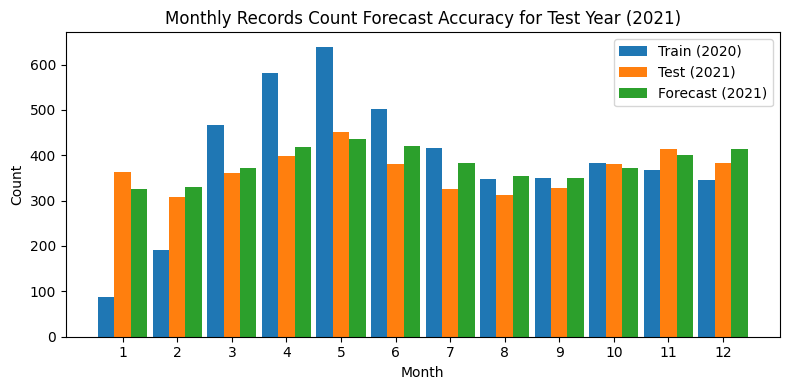

Month 1: Forecasted Count = 324.60135382787035
Month 2: Forecasted Count = 328.9544730170609
Month 3: Forecasted Count = 370.9421962539826
Month 4: Forecasted Count = 417.19632602652223
Month 5: Forecasted Count = 436.2718621754709
Month 6: Forecasted Count = 419.3334155353788
Month 7: Forecasted Count = 382.8147543168137
Month 8: Forecasted Count = 353.85402946846733
Month 9: Forecasted Count = 350.67426619830707
Month 10: Forecasted Count = 371.70958522852607
Month 11: Forecasted Count = 399.47613995294813
Month 12: Forecasted Count = 414.50091867659575


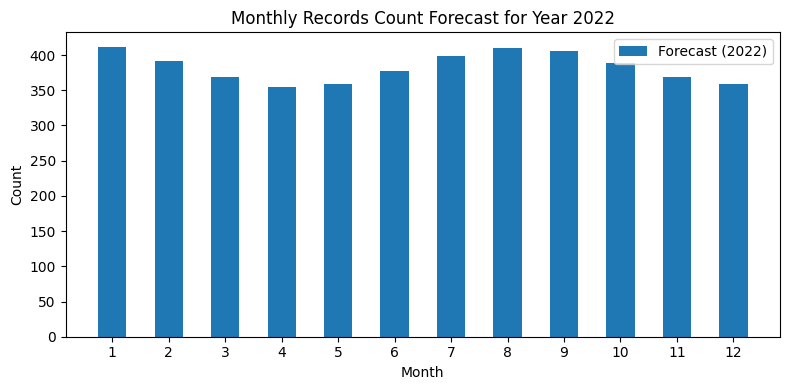

Month 1: Forecasted Count = 411.720056545146
Month 2: Forecasted Count = 391.40486781180476
Month 3: Forecasted Count = 368.355938548498
Month 4: Forecasted Count = 354.629576141451
Month 5: Forecasted Count = 359.2766111525779
Month 6: Forecasted Count = 377.63236758046025
Month 7: Forecasted Count = 399.313602647386
Month 8: Forecasted Count = 410.68935823458963
Month 9: Forecasted Count = 406.243936238442
Month 10: Forecasted Count = 388.74380709273254
Month 11: Forecasted Count = 369.4963879684914
Month 12: Forecasted Count = 359.4643192697672


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the CSV file
df_data = pd.read_csv("gymdata.csv")
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year and month from the 'Date' column
df_data['Year'] = df_data['Date'].dt.year
df_data['Month'] = df_data['Date'].dt.month

# Group and count the records for each year and month
monthly_counts = df_data.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Create the x-axis values
months = np.arange(1, 13)

# Filter the data for training and test based on the desired years
train_data = monthly_counts.loc[monthly_counts['Year'] == 2020]['Count'].values
test_data = monthly_counts.loc[monthly_counts['Year'] == 2021]['Count'].values

# Concatenate all years' data for overall count
all_years_data = monthly_counts['Count'].values

import warnings
warnings.filterwarnings("ignore")

# Use auto_arima to determine the best ARIMA model
model = auto_arima(train_data, seasonal=False)

# Print the model summary
print(model.summary())

# Fit the ARIMA model using the training data
model_fit = ARIMA(train_data, order=(3,0,3)).fit()

# Get the forecasted values for the test period
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the bar width
bar_width = 0.3

# Plot the data for the initial forecast (2021)
plt.figure(figsize=(8, 4))
plt.bar(months - bar_width, train_data, width=bar_width, label='Train (2020)')
plt.bar(months, test_data, width=bar_width, label='Test (2021)')
plt.bar(months + bar_width, forecast, width=bar_width, label='Forecast (2021)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Records Count Forecast Accuracy for Test Year (2021)')
plt.legend()
plt.xticks(months)
plt.tight_layout()
plt.show()

# Print the forecasted counts for each month
for month, forecast_count in zip(months, forecast):
    print(f"Month {month}: Forecasted Count = {forecast_count}")   
    
# Check if there is real data available for the next year (2022)
if 2022 in monthly_counts['Year'].values:
    
    # Calculate the bar width
    bar_width = 0.4
    
    # Update the train_data with the forecasted values
    train_data = np.concatenate([train_data, forecast])
    
    # Get the real data for the next year
    real_data_2022 = monthly_counts.loc[monthly_counts['Year'] == 2022]['Count'].values
    
    # Fit the ARIMA model using the training data
    model_fit = ARIMA(train_data, order=(4,0,0)).fit()
    
    # Get the forecasted values for the next year
    forecast_2022 = model_fit.forecast(steps=len(real_data_2022))
    
    # Plot the data for the forecast (2022) with the real data
    plt.figure(figsize=(8, 4))
    plt.bar(months, real_data_2022, width=bar_width, label='Real Data (2022)')
    plt.bar(months + bar_width, forecast_2022, width=bar_width, label='Forecast (2022)')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Monthly Records Count Forecast for Year 2022')
    plt.legend()
    plt.xticks(months)
    plt.tight_layout()
    plt.show()
    
    # Print the forecasted counts for each month
    for month, forecast_count in zip(months, forecast_2022):
        print(f"Month {month}: Forecasted Count = {forecast_count}")
        
    
    # Check if there is real data available for the next year (2023)
    if 2023 in monthly_counts['Year'].values:
        
        # Calculate the bar width
        bar_width = 0.4
        
        # Update the train_data with the forecasted values
        train_data = np.concatenate([train_data, forecast_2022])

        # Get the real data for the next year
        real_data_2023 = monthly_counts.loc[monthly_counts['Year'] == 2023]['Count'].values

        # Fit the ARIMA model using the training data
        model_fit = ARIMA(train_data, order=(4,0,0)).fit()

        # Get the forecasted values for the next year
        forecast_2023 = model_fit.forecast(steps=len(real_data_2023))

        # Plot the data for the forecast (2023) with the real data
        plt.figure(figsize=(8, 4))
        plt.bar(months, real_data_2023, width=bar_width, label='Real Data (2023)')
        plt.bar(months + bar_width, forecast_2023, width=bar_width, label='Forecast (2023)')
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.title('Monthly Records Count Forecast for Year 2023')
        plt.legend()
        plt.xticks(months)
        plt.tight_layout()
        plt.show()
    
        # Print the forecasted counts for each month
        for month, forecast_count in zip(months, forecast_2023):
            print(f"Month {month}: Forecasted Count = {forecast_count}")
            
        
        # Check if there is real data available for the next year (2024)
        if 2024 in monthly_counts['Year'].values:
            
            # Calculate the bar width
            bar_width = 0.4
            
            # Update the train_data with the forecasted values
            train_data = np.concatenate([train_data, forecast_2023])

            # Get the real data for the next year
            real_data_2024 = monthly_counts.loc[monthly_counts['Year'] == 2024]['Count'].values

            # Fit the ARIMA model using the training data
            model_fit = ARIMA(train_data, order=(4,0,0)).fit()

            # Get the forecasted values for the next year
            forecast_2024 = model_fit.forecast(steps=len(real_data_2024))

            # Plot the data for the forecast (2024) with the real data
            plt.figure(figsize=(8, 4))
            plt.bar(months, real_data_2024, width=bar_width, label='Real Data (2024)')
            plt.bar(months + bar_width, forecast_2024, width=bar_width, label='Forecast (2024)')
            plt.xlabel('Month')
            plt.ylabel('Count')
            plt.title('Monthly Records Count Forecast for Year 2024')
            plt.legend()
            plt.xticks(months)
            plt.tight_layout()
            plt.show()

            # Print the forecasted counts for each month
            for month, forecast_count in zip(months, forecast_2024):
                print(f"Month {month}: Forecasted Count = {forecast_count}")
                
            
            # Check if there is real data available for the next year (2025)
            if 2025 in monthly_counts['Year'].values:
                
                # Calculate the bar width
                bar_width = 0.4
                
                # Update the train_data with the forecasted values
                train_data = np.concatenate([train_data, forecast_2024])

                # Get the real data for the next year
                real_data_2025 = monthly_counts.loc[monthly_counts['Year'] == 2025]['Count'].values

                # Fit the ARIMA model using the training data
                model_fit = ARIMA(train_data, order=(4,0,0)).fit()

                # Get the forecasted values for the next year
                forecast_2025 = model_fit.forecast(steps=len(real_data_2025))

                # Plot the data for the forecast (2025) with the real data
                plt.figure(figsize=(8, 4))
                plt.bar(months, real_data_2025, width=bar_width, label='Real Data (2025)')
                plt.bar(months + bar_width, forecast_2025, width=bar_width, label='Forecast (2025)')
                plt.xlabel('Month')
                plt.ylabel('Count')
                plt.title('Monthly Records Count Forecast for Year 2025')
                plt.legend()
                plt.xticks(months)
                plt.tight_layout()
                plt.show()

                # Print the forecasted counts for each month
                for month, forecast_count in zip(months, forecast_2025):
                    print(f"Month {month}: Forecasted Count = {forecast_count}")

            # Check if there is not real data available for the next year (2025)
            if 2025 not in monthly_counts['Year'].values:
                
                # Calculate the bar width
                bar_width = 0.5
                
                # Update the train_data with the forecasted values
                train_data = np.concatenate([train_data, forecast_2024])

                # Fit the ARIMA model using the training data
                model_fit = ARIMA(train_data, order=(4,0,0)).fit()

                # Get the forecasted values for the next year
                forecast_2025 = model_fit.forecast(steps=12)

                # Plot the data for the forecast (2025) with the real data
                plt.figure(figsize=(8, 4))
                plt.bar(months, forecast_2025, width=bar_width, label='Forecast (2025)')
                plt.xlabel('Month')
                plt.ylabel('Count')
                plt.title('Monthly Records Count Forecast for Year 2025')
                plt.legend()
                plt.xticks(months)
                plt.tight_layout()
                plt.show()

                # Print the forecasted counts for each month
                for month, forecast_count in zip(months, forecast_2025):
                    print(f"Month {month}: Forecasted Count = {forecast_count}")
                    
        
        # Check if there is not real data available for the next year (2024)
        if 2024 not in monthly_counts['Year'].values:
            
            # Calculate the bar width
            bar_width = 0.5
            
            # Update the train_data with the forecasted values
            train_data = np.concatenate([train_data, forecast_2023])

            # Fit the ARIMA model using the training data
            model_fit = ARIMA(train_data, order=(4,0,0)).fit()

            # Get the forecasted values for the next year
            forecast_2024 = model_fit.forecast(steps=12)

            # Plot the data for the forecast (2024) with the real data
            plt.figure(figsize=(8, 4))
            plt.bar(months, forecast_2024, width=bar_width, label='Forecast (2024)')
            plt.xlabel('Month')
            plt.ylabel('Count')
            plt.title('Monthly Records Count Forecast for Year 2024')
            plt.legend()
            plt.xticks(months)
            plt.tight_layout()
            plt.show()

            # Print the forecasted counts for each month
            for month, forecast_count in zip(months, forecast_2024):
                print(f"Month {month}: Forecasted Count = {forecast_count}")
        
    
    # Check if there is not real data available for the next year (2023)
    if 2023 not in monthly_counts['Year'].values:
        
        # Calculate the bar width
        bar_width = 0.5
        
         # Update the train_data with the forecasted values
        train_data = np.concatenate([train_data, forecast_2022])

        # Fit the ARIMA model using the training data
        model_fit = ARIMA(train_data, order=(4,0,0)).fit()

        # Get the forecasted values for the next year
        forecast_2023 = model_fit.forecast(steps=12)

        # Plot the data for the forecast (2023) with the real data
        plt.figure(figsize=(8, 4))
        plt.bar(months, forecast_2023, width=bar_width, label='Forecast (2023)')
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.title('Monthly Records Count Forecast for Year 2023')
        plt.legend()
        plt.xticks(months)
        plt.tight_layout()
        plt.show()

        # Print the forecasted counts for each month
        for month, forecast_count in zip(months, forecast_2023):
            print(f"Month {month}: Forecasted Count = {forecast_count}")
        
        
# Check if there is not real data available for the next year (2022)
if 2022 not in monthly_counts['Year'].values:
    
    # Calculate the bar width
    bar_width = 0.5
    
    # Update the train_data with the forecasted values
    train_data = np.concatenate([train_data, forecast])
    
    # Fit the ARIMA model using the training data
    model_fit = ARIMA(train_data, order=(4,0,0)).fit()
    
    # Get the forecasted values for the next year
    forecast_2022 = model_fit.forecast(steps=12)
    
    # Plot the data for the forecast (2022) with the real data
    plt.figure(figsize=(8, 4))
    plt.bar(months, forecast_2022, width=bar_width, label='Forecast (2022)')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Monthly Records Count Forecast for Year 2022')
    plt.legend()
    plt.xticks(months)
    plt.tight_layout()
    plt.show()
    
    # Print the forecasted counts for each month
    for month, forecast_count in zip(months, forecast_2022):
        print(f"Month {month}: Forecasted Count = {forecast_count}")

In [42]:
test_data.mean()

366.8333333333333

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test_data, forecast)
mae

26.517619859026073

In [44]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
rmse

30.084927397571146

In [45]:
# Calculate MAPE
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
mape

7.522101007501286